In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [20]:
TrainData = os.path.join('C:\CVPR\CIFAR-10-images-master', 'train')
TestData = os.path.join('C:\CVPR\CIFAR-10-images-master', 'test')

In [21]:
ImgSize = 64
categories = []

for i in os.listdir(TrainData):
    categories.append(i)

print(categories)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


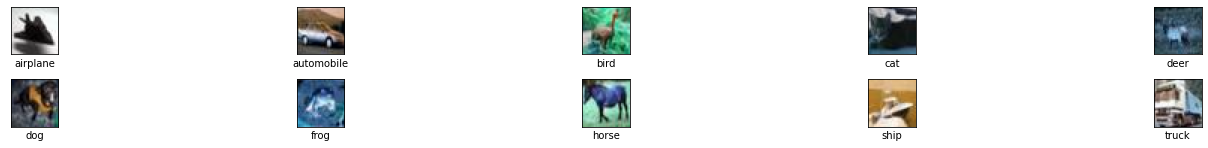

In [22]:
plt.figure(figsize=(20,10))
i=0
for c in categories:  
    path = os.path.join(TrainData,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show() 

In [23]:
trainingdata = []

for c in categories:
    path = os.path.join(TrainData, c) 
    class_num = categories.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (ImgSize, ImgSize)) 
            trainingdata.append([img_resized, class_num]) 
        except:
            pass
        
print(len(trainingdata))

100%|██████████| 5000/5000 [00:01<00:00, 3123.26it/s]

50000


In [24]:
testingdata = []
ccount = True

for c in categories:
    path = os.path.join(TestData, c) 
    class_num = categories.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (ImgSize, ImgSize))  
            testingdata.append([img_resized, class_num])
        except Exception as e:
            print(e)
            break
        
print(len(testingdata))

100%|██████████| 1000/1000 [00:00<00:00, 2851.91it/s]

10000
